**ФИО: Соколова Марина Сергеевна**

**Группа: АДЭУ-201**


# Практическая работа 2.1. Анализ данных с помощью DASK




**Задание.**

`2.1.1.` Настроить среду и рабочий каталог.

`2.1.2.` Загрузить данные.

`2.1.3.` Проверить качество данных (например, отсутствующие значения и выбросы).

`2.1.4.` Удалить столбцы (множество пропусков в значениях, бесполезные столбцы для анализа).

`2.1.1.` **Настроить среду и рабочий каталог.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls

'- (1).txt'
'Colab Notebooks'/
'feedback_msergeevsokolova@sberbank.ru (1).gsheet'
'Give an example of banks with a digital business model.gdoc'
 mydask.png
 Parking_Violations_Issued_-_Fiscal_Year_2015.csv
 Tech.zip
 -.txt
 АДЭУ-201.gsheet
'АДЭУ-201 Применение контейнеров для работы с данными.xlsx'
'Диаграмма без названия (1).drawio'
'Диаграмма без названия (2).drawio'
'Диаграмма без названия (3).drawio'
'Диаграмма без названия.drawio'
'Задание 1.1.drawio'
'Копия Яндекс.Практикум. Модуль 1. Уроки 1–3 .gsheet'
 Мастерская.csv
 Мастерская.csv.gsheet
 Мастерская.zip
'Новая форма.gform'
 Резюме.gdoc
'Учебная практика АДЭУ-201'/
 Фото/


In [4]:
!pip install "dask[complete]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.5 MB/s eta 0:00:00


In [5]:
# import libraries
import sys
import os

## import dask libraries
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# import libraries
import pandas as pd

In [6]:
cwd = os.getcwd()

# print
print('', sys.executable)
print('', cwd)

 /usr/bin/python3
 /content/drive/MyDrive


`2.1.2.` **Загрузить данные.**

In [7]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# Read the CSV file with explicit data types for all columns
df = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2015.csv', dtype={
    'Meter Number': 'object',
    'Time First Observed': 'object',
    'Violation Location': 'float64',
    'Feet From Curb': 'float64',
    'Vehicle Year': 'float64',
    'Violation Legal Code': 'object',
    'Double Parking Violation': 'object',
       'Hydrant Violation': 'object',
       'No Standing or Stopping Violation': 'object',
    'Law Section': 'float64'  # Specify the data type for the Law Section column
})

`2.1.3.` **Проверить качество данных (например, отсутствующие значения и выбросы).**

In [8]:
# count missing values
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
BBL               int64
Violation Time      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [9]:
# calculate percent missing values
mysize = df.index.size
missing_count = ((missing_values / mysize) * 100)
missing_count

Dask Series Structure:
npartitions=1
BBL               float64
Violation Time        ...
dtype: float64
Dask Name: mul, 9 graph layers

In [10]:
# запуск вычисления, используя метод подсчета
with ProgressBar():
  missing_count_percent = missing_count.compute()
missing_count_percent

[#####################                   ] | 53% Completed | 102.58 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[##########################              ] | 66% Completed | 127.21 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 174.58 s


Summons Number                         0.000000
Plate ID                               0.019739
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.387968
Vehicle Make                           0.639500
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    15.235282
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        15.102234
Issuer Squad                          15.103733
Violation Time                         0.014523
Time First Observed                   89

`2.1.4.` **Удалить столбцы (пропуски в значениях, бесполезные столбцы для анализа).**

In [11]:
# операция фильтрации разреженных столбцов (более 60% пропущенных значений) и сохраняем оставшиеся
columns_to_drop = missing_count_percent[missing_count_percent > 60].index
print(columns_to_drop)

# drop sparse columns
with ProgressBar():
    #df_dropped = df.drop(columns_to_drop, axis=1).persist()
    df_dropped = df.drop(columns_to_drop, axis=1).compute()

Index(['Time First Observed', 'Intersecting Street', 'Violation Legal Code',
       'Unregistered Vehicle?', 'Meter Number',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'Latitude', 'Longitude', 'Community Board',
       'Community Council ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')
[#####################                   ] | 54% Completed | 52.84 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[###########################             ] | 68% Completed | 65.65 s

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 91.77 s


In [12]:
df.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,10/01/2014,21,SUBN,CHEVR,T,20390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,03/06/2015,14,VAN,FRUEH,T,27790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7611181981,FYW2775,NY,PAS,07/28/2014,46,SUBN,SUBAR,T,8130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7445908067,GWE1987,NY,PAS,04/13/2015,19,4DSD,LEXUS,T,59990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7037692864,T671196C,NY,PAS,05/19/2015,19,4DSD,CHRYS,T,36090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Обратите внимание на то, что:

- использовать `Pandas Series` для удаления столбцов в `Dask DataFrame`, поскольку каждый раздел является `Pandas DataFrame`.

- В случае, если серия доступна для всех потоков, в кластере она будет сериализована и широковещательно передана всем рабочим узлам.

- Метод `.persist()` позволяет хранить в памяти промежуточные вычисления, чтобы их можно было использовать повторно.

# Практическая работа 2.2. Визуализация ориентированных ациклических графов (DAG)

- `DASK` использует библиотеку `Graviz` для создания визуального представления групп `DAG`, созданных планировщиком.

- и спользуйте метод `.visualize()` для проверки групп `DAG DataFrames`, `Series`, `Bag` и массивов.

Для упрощения будем использовать объект `Dask Delayed` вместо `DataFrames`, поскольку они становятся довольно большими и их трудно визуализировать.

- `Delayed` — это конструктор, который позволяет обертывать функции и создавать объекты `Dask Delayed`, эквивалентные узлу в `DAG`. Объединяя захваченные объекты, создаем группу доступа к данным.

Ниже приведены два примера: в первом  `DAG` только с одним узлом и зависимостями, а во втором  - `DAG` с несколькими узлами и зависимостями.

**Задание.**

`2.2.1.` Визуализировать `DAG` с одним узлом и зависимостями.

`2.2.1.` Визуализировать `DAG` с более чем одним узлом и зависимостями.



`2.1.1.` **Визуализировать `DAG` с одним узлом и зависимостями.**

In [13]:
# import library
import dask.delayed as delayed

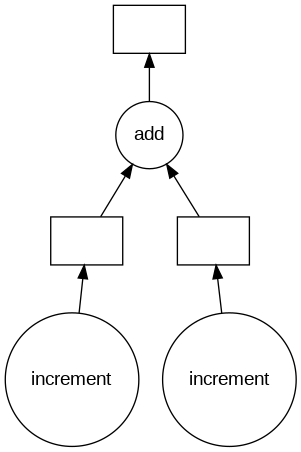

In [14]:
def increment(i):
    return i + 1

def add(x, y):
    return x + y

# функции переноса внутри отложенного объекта и цепочки
x = delayed(increment)(1)
y = delayed(increment)(2)
z = delayed(add)(x, y)

# visualize the DAG
z.visualize()

In [15]:
# show the result
z.compute()

5

Обратите внимание на то, что:

- Чтобы построить узел, в функцию передали захваченный объект, а затем передали аргументы этой функции. Можно использовать декораторы.

- Круги указывают на функцию и вычисления, а квадраты — промежуточный или конечный результат.

- Входящие стрелки представляют зависимости. Функция `increment` не имеет никаких зависимостей, а функция `add` — две. Таким образом, функция `add`  должна ждать, пока не будут вычислены объекты `x` и `y`.

- Функции без зависимостей могут вычисляться независимо, и каждой из них можно назначить `workera`.

- Используйте метод `.visualize()` на последнем узле с зависимостями.

- `Dask` не расчитывает `DAG`. Используйте метод `.compute()` на последнем узле, чтобы увидеть результат.

`2.2.2.` **Визуализировать `DAG` с более чем одним узлом и зависимостями.**

построить более сложную группу `DAG` с двумя уровнями:

- `Layer1` создается путем циклического перебора списка данных  в ​`​dask` . Этот слой объединяет ранее созданное приращение функции со значениями в списке, а затем использует встроенное суммирование функции для объединения результатов;

- `Layer2` построен циклически для каждого объекта, созданного в `Layer1`.

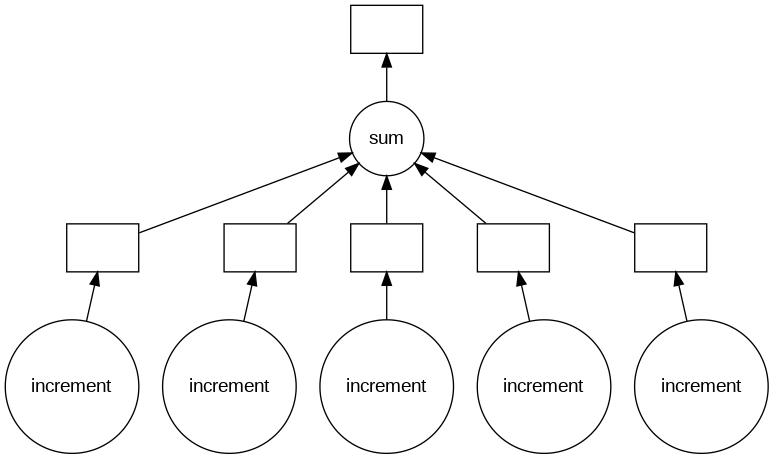

In [16]:
data = [1, 2, 3, 4, 5]

# compile first layer and visualize
layer1 = [delayed(increment)(i) for i in data]
total1 = delayed(sum)(layer1)
total1.visualize()

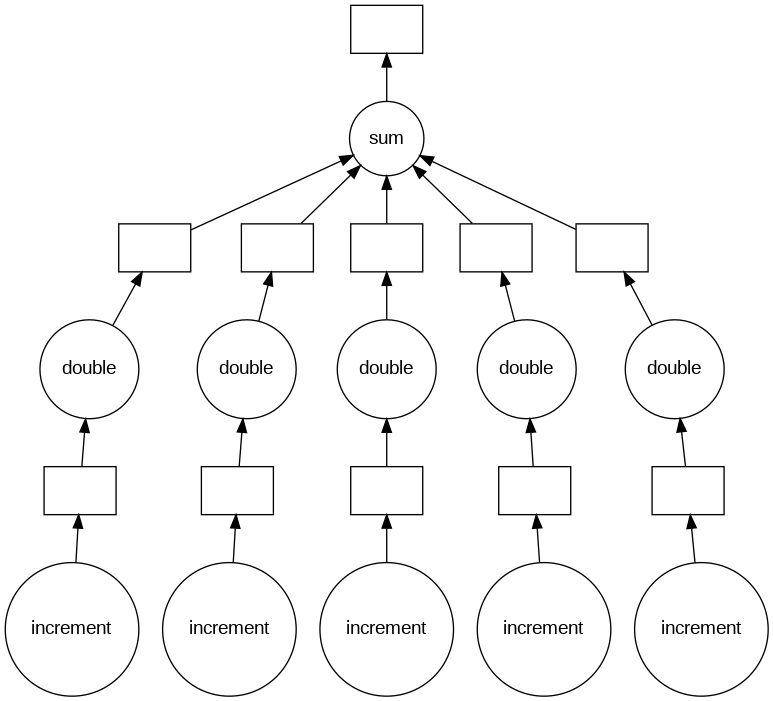

In [17]:
def double(x):
    return x * 2

# compile second layer and visualize
layer2 = [delayed(double)(j) for j in layer1]
total2 = delayed(sum)(layer2)#.persist()
total2.visualize()

In [18]:
z = total2.compute()
z

40

Обратите внимание на то, что:

- построение через использование функции,

- используем `.persist()`, и результат будет представлен на графике в виде прямоугольника.

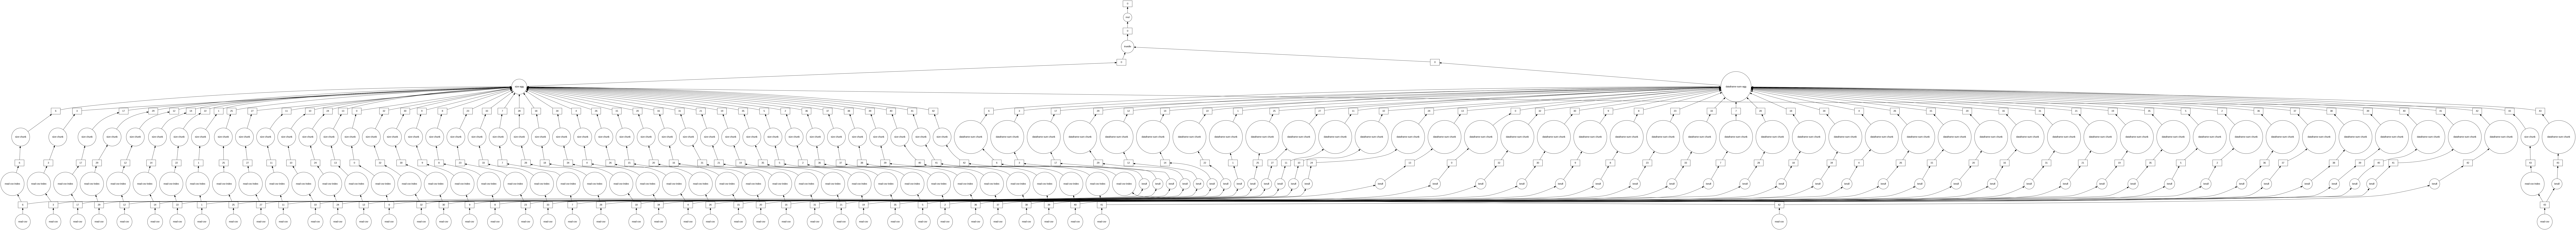

In [19]:
# visualize DAGs built from the DataFrame
missing_count.visualize()


# Самостоятельная работа

Каталог датасетов [тут](https://disk.yandex.ru/d/fbPE3VNKYocd7g). Прямая ссылка https://disk.yandex.ru/d/fbPE3VNKYocd7g.

Выполнить пункты

`2.1.1.` - `2.1.4.`,

`2.2.1.` - `2.2.2.`,

по вариантам:

01. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
02. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
03. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
04. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
05. `UK Property Price official data 1995-202304.zip`.
06. `Austin, TX House Listings.zip`.
07. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
08. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
09. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
10. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
11. `UK Property Price official data 1995-202304.zip`.
12. `Austin, TX House Listings.zip`.
13. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
14. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
15. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
16. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
17. `UK Property Price official data 1995-202304.zip`.
18. `Austin, TX House Listings.zip`.
19. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
20. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
21. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
22. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
23. `UK Property Price official data 1995-202304.zip`.
24. `Austin, TX House Listings.zip`.
25. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.




